In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/titanic_data.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
data['Age'] = data['Age'].fillna(np.mean(data['Age']))

In [9]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [11]:
data['Cabin'] = data['Cabin'].fillna(data['Cabin'].mode()[0])

In [13]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

<Axes: ylabel='Age'>

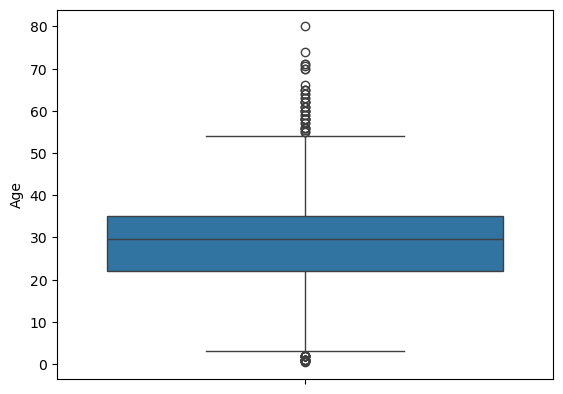

In [17]:
sns.boxplot(data['Age'])

<Axes: xlabel='count', ylabel='Sex'>

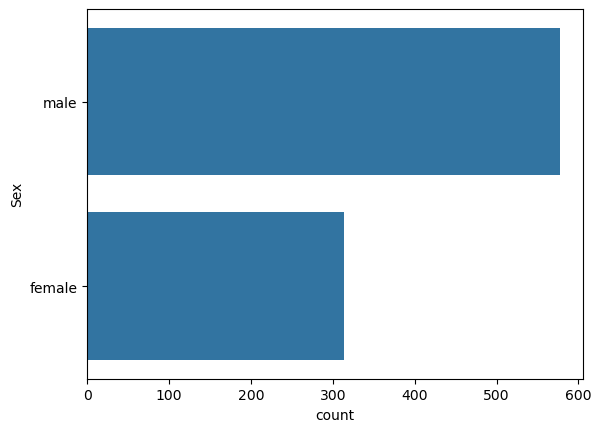

In [41]:
sns.countplot(data['Sex'])

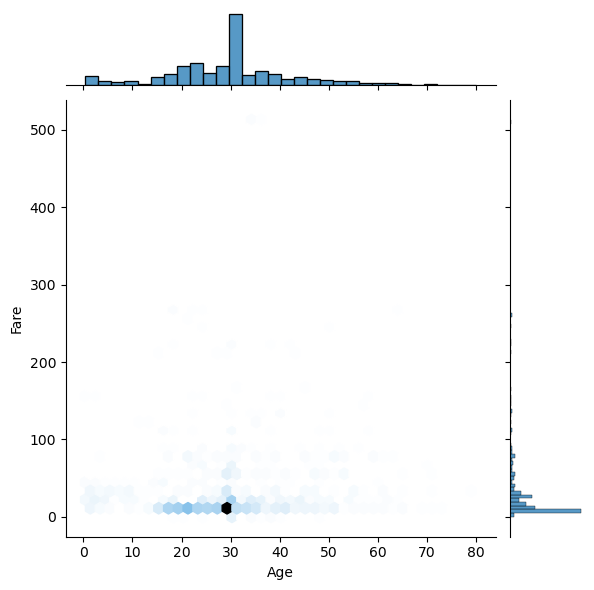

In [47]:
sns.jointplot(x='Age', y='Fare', data=data, kind='hex')

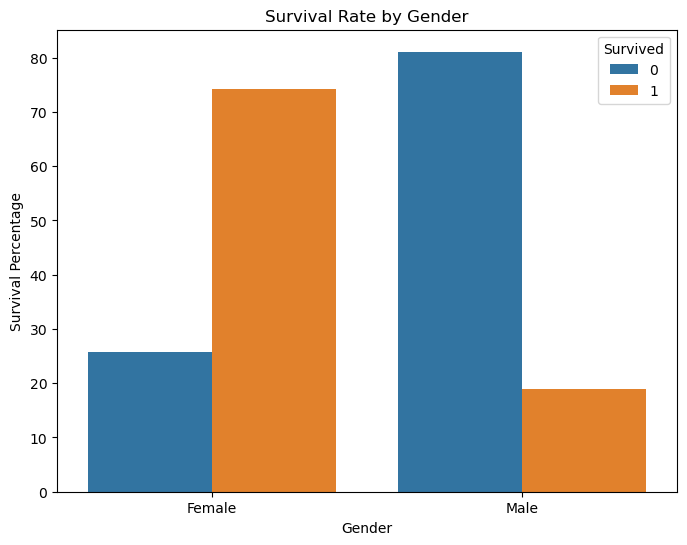

In [39]:
gender_survival = data.groupby('Sex')['Survived'].value_counts(normalize=True).mul(100).rename('Percentage').reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Percentage', hue='Survived', data=gender_survival)
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Percentage')
plt.xlabel('Gender')
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()


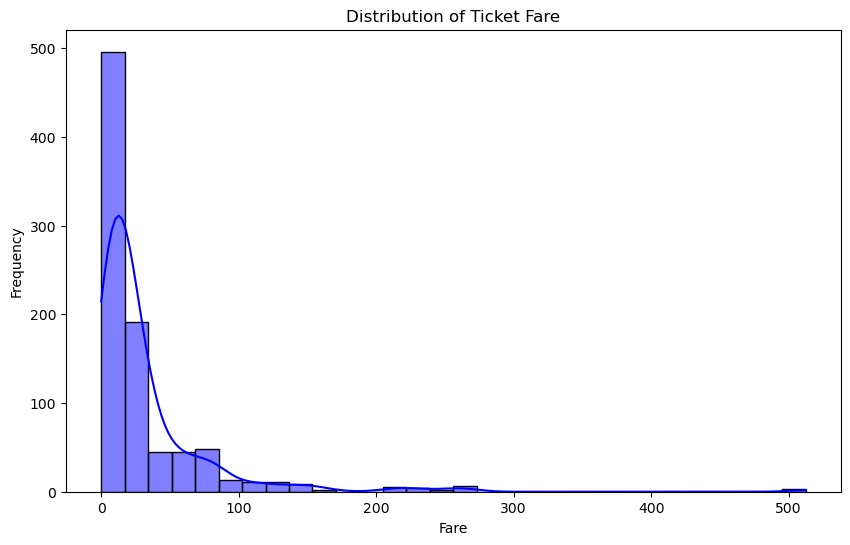

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Fare'], kde=True, bins=30, color='blue')
plt.title('Distribution of Ticket Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show() 